In [68]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
import itertools
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import statsmodels.formula.api as smf
from datetime import datetime

In [94]:
df_west = pd.read_csv('../data/df_west_merge.csv')

In [95]:
df_west.head()

,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
0,0,2013,21,West,90,153.8,53.3,34.3,1,28.3,...,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2013,22,West,93,91.9,72.7,34.7,1,28.4,...,9.0,3.0,-4.0,0.0,-2.0,0.0,-1.0,0.0,1.0,0.0
2,2,2013,23,West,120,562.1,63.4,35.4,1,28.5,...,18.0,4.0,27.0,31.0,24.0,26.0,9.0,10.0,1.0,0.0
3,3,2013,24,West,239,51.5,67.3,34.7,1,30.0,...,14.0,2.0,-14.0,-41.0,-13.0,-37.0,-4.0,-13.0,-2.0,-3.0
4,4,2013,25,West,286,0.0,56.9,35.0,0,30.1,...,8.0,2.0,-17.0,-3.0,-16.0,-3.0,-6.0,-2.0,0.0,2.0


In [96]:
df_west['yr'] = df_west['yr'].astype(str)
df_west['week'] = df_west['week'].astype(str)
df_west['index'] = df_west['yr'] + '-' + df_west['week']
df_west.head()


,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff,index
0,0,2013,21,West,90,153.8,53.3,34.3,1,28.3,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-21
1,1,2013,22,West,93,91.9,72.7,34.7,1,28.4,...,3.0,-4.0,0.0,-2.0,0.0,-1.0,0.0,1.0,0.0,2013-22
2,2,2013,23,West,120,562.1,63.4,35.4,1,28.5,...,4.0,27.0,31.0,24.0,26.0,9.0,10.0,1.0,0.0,2013-23
3,3,2013,24,West,239,51.5,67.3,34.7,1,30.0,...,2.0,-14.0,-41.0,-13.0,-37.0,-4.0,-13.0,-2.0,-3.0,2013-24
4,4,2013,25,West,286,0.0,56.9,35.0,0,30.1,...,2.0,-17.0,-3.0,-16.0,-3.0,-6.0,-2.0,0.0,2.0,2013-25


In [97]:
df_west = df_west.groupby(by='index').mean()
df_west.head()

C:\Users\ngzen\AppData\Local\Temp\ipykernel_17988\985596634.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_west = df_west.groupby(by='index').mean()


,Unnamed: 0,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,mean_wind_sp,min_temp,dengue_fever,...,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,,
2013-21,0.0,90.0,153.8,53.3,34.3,1.0,28.3,6.627778,23.1,33.0,...,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-22,1.0,93.0,91.9,72.7,34.7,1.0,28.4,6.977778,22.9,29.0,...,9.0,3.0,-4.0,0.0,-2.0,0.0,-1.0,0.0,1.0,0.0
2013-23,2.0,120.0,562.1,63.4,35.4,1.0,28.5,7.022222,22.4,56.0,...,18.0,4.0,27.0,31.0,24.0,26.0,9.0,10.0,1.0,0.0
2013-24,3.0,239.0,51.5,67.3,34.7,1.0,30.0,9.268254,23.6,42.0,...,14.0,2.0,-14.0,-41.0,-13.0,-37.0,-4.0,-13.0,-2.0,-3.0
2013-25,4.0,286.0,0.0,56.9,35.0,0.0,30.1,8.660317,23.6,25.0,...,8.0,2.0,-17.0,-3.0,-16.0,-3.0,-6.0,-2.0,0.0,2.0


In [98]:
df_west = df_west.drop(['Unnamed: 0',],axis =1)
df_west

,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,mean_wind_sp,min_temp,dengue_fever,dengue,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,
2013-21,90.0,153.8,53.3,34.3,1.0,28.3,6.627778,23.1,33.0,30.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-22,93.0,91.9,72.7,34.7,1.0,28.4,6.977778,22.9,29.0,28.0,9.0,3.0,-4.0,0.0,-2.0,0.0,-1.0,0.0,1.0,0.0
2013-23,120.0,562.1,63.4,35.4,1.0,28.5,7.022222,22.4,56.0,52.0,18.0,4.0,27.0,31.0,24.0,26.0,9.0,10.0,1.0,0.0
2013-24,239.0,51.5,67.3,34.7,1.0,30.0,9.268254,23.6,42.0,39.0,14.0,2.0,-14.0,-41.0,-13.0,-37.0,-4.0,-13.0,-2.0,-3.0
2013-25,286.0,0.0,56.9,35.0,0.0,30.1,8.660317,23.6,25.0,23.0,8.0,2.0,-17.0,-3.0,-16.0,-3.0,-6.0,-2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-5,167.0,802.3,60.8,33.8,1.0,27.7,10.067391,22.9,8.0,7.0,7.0,2.0,-1.0,-1.0,-1.0,-1.0,-2.0,-5.0,0.0,-1.0
2020-6,221.0,103.7,68.8,34.4,1.0,27.7,11.176596,22.9,17.0,16.0,9.0,3.0,9.0,10.0,9.0,10.0,2.0,4.0,1.0,1.0
2020-7,303.0,371.0,56.5,34.4,1.0,27.7,8.953191,22.8,16.0,16.0,11.0,3.0,-1.0,-10.0,0.0,-9.0,2.0,0.0,0.0,-1.0


In [99]:
def scale(x):
    max = x.max(0)
    min = x.min(0)
    x = (x - min)/(max-min)
    return x

In [100]:
df_west_X = scale(df_west.drop(['no_cases'],axis =1))
df_west_X

,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,mean_wind_sp,min_temp,dengue_fever,dengue,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,
2013-21,0.131757,0.162905,0.727273,1.0,0.672727,0.138038,0.916667,0.589286,0.576923,0.10,0.035088,0.386364,0.569444,0.400,0.587302,0.335664,0.598326,0.345238,0.604317
2013-22,0.078729,0.353288,0.779221,1.0,0.690909,0.176965,0.908730,0.517857,0.538462,0.09,0.052632,0.295455,0.569444,0.350,0.587302,0.328671,0.598326,0.357143,0.604317
2013-23,0.481539,0.262022,0.870130,1.0,0.709091,0.181908,0.888889,1.000000,1.000000,0.18,0.070175,1.000000,1.000000,1.000,1.000000,0.398601,0.640167,0.357143,0.604317
2013-24,0.044119,0.300294,0.779221,1.0,0.981818,0.431714,0.936508,0.750000,0.750000,0.14,0.035088,0.068182,0.000000,0.075,0.000000,0.307692,0.543933,0.321429,0.582734
2013-25,0.000000,0.198234,0.818182,0.0,1.000000,0.364099,0.936508,0.446429,0.442308,0.08,0.035088,0.000000,0.527778,0.000,0.539683,0.293706,0.589958,0.345238,0.618705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-5,0.687313,0.236506,0.662338,1.0,0.563636,0.520595,0.908730,0.142857,0.134615,0.07,0.035088,0.363636,0.555556,0.375,0.571429,0.321678,0.577406,0.345238,0.597122
2020-6,0.088837,0.315015,0.740260,1.0,0.563636,0.643961,0.908730,0.303571,0.307692,0.09,0.052632,0.590909,0.708333,0.625,0.746032,0.349650,0.615063,0.357143,0.611511
2020-7,0.317827,0.194308,0.740260,1.0,0.563636,0.396672,0.904762,0.285714,0.307692,0.11,0.052632,0.363636,0.430556,0.400,0.444444,0.349650,0.598326,0.345238,0.597122


In [101]:
x_train, x_test, y_train, y_test =  train_test_split(df_west_X, df_west['no_cases'], test_size = 0.33, random_state = 42)

In [102]:
x = x_train
x = sm.add_constant(x)
y = y_train

In [103]:
poison_model = sm.GLM(y, x, family = sm.families.Poisson())
poison_results = poison_model.fit()

print(poison_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               no_cases   No. Observations:                  261
Model:                            GLM   Df Residuals:                      241
Model Family:                 Poisson   Df Model:                           19
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15351.
Date:                Sat, 15 Apr 2023   Deviance:                       29215.
Time:                        08:17:08   Pearson chi2:                 4.18e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [104]:
alpha = 0.01
name = list(poison_results.pvalues[poison_results.pvalues < alpha].index)

In [105]:
x_train_ = sm.add_constant(x_train)
x = x_train_[name]
y = y_train

In [106]:
poison_model = sm.GLM(y, x, family = sm.families.Poisson())
poison_results = poison_model.fit()

print(poison_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               no_cases   No. Observations:                  261
Model:                            GLM   Df Residuals:                      246
Model Family:                 Poisson   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15362.
Date:                Sat, 15 Apr 2023   Deviance:                       29238.
Time:                        08:17:11   Pearson chi2:                 4.19e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [107]:
poison_results.get_prediction(x).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper
index,,,,
2020-32,455.113162,9.901182,436.115118,474.938800
2015-41,68.363755,1.471674,65.539330,71.309898
2019-38,133.543010,4.886677,124.300691,143.472538
2017-15,56.738088,1.636640,53.619324,60.038255
2016-38,168.419107,3.388509,161.906993,175.193146
...,...,...,...,...
2014-45,72.053384,1.319777,69.512549,74.687093
2015-3,86.389344,2.229323,82.128610,90.871120
2018-35,86.725083,1.534232,83.769578,89.784861


In [108]:
poison_results.mu

array([455.11316227,  68.3637548 , 133.54300996,  56.73808833,
       168.41910668,  66.08557684, 107.59248444, 116.52076521,
        74.14064185, 134.50494085,  53.63176251,  69.79179612,
       130.5109397 , 110.3463948 ,  59.74985082,  34.67890446,
       341.80817484,  64.69870886,  86.45120987,  97.65235106,
       137.89462443,  91.07553921, 143.15359104,  85.57298935,
       102.1262162 ,  99.66588032,  74.46547878, 147.86333727,
       443.44676941,  66.00746829,  92.41827134,  92.24064418,
        71.67551181,  71.81288477,  88.47796682, 101.32876945,
        99.2584105 , 137.89235004,  73.63106393,  72.7566083 ,
        83.62798422,  77.33381663, 133.85799808,  93.03314805,
       111.54941016,  60.24061571, 121.21236518, 116.15406493,
       109.95671895, 112.73253316, 102.37285038, 262.77458123,
        90.72074709,  99.7074753 ,   1.74539564,  99.00699981,
        97.50844814,  75.45258037, 160.68774506,  80.02220249,
        96.02781222, 109.90646352,  88.42678654,  88.80

Test result

In [109]:
x_test = sm.add_constant(x_test)
test_x = x_test[name]
test_y = y_test

In [110]:
poisson_predictions = poison_results.get_prediction(test_x)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

               mean    mean_se  mean_ci_lower  mean_ci_upper
index                                                       
2013-30  179.528847   3.244363     173.281308     186.001637
2014-19  100.110199   2.234424      95.825216     104.586791
2014-10  230.520777   9.551341     212.540452     250.022187
2019-26  205.291954   2.792235     199.891576     210.838231
2020-31  506.281963  15.066000     477.597777     536.688900
...             ...        ...            ...            ...
2016-42   70.810918   1.879390      67.221548      74.591946
2018-21  114.459294   2.034532     110.540347     118.517178
2020-5   105.820570   2.355766     101.302634     110.539998
2016-13  133.027924   2.821204     127.611809     138.673910
2017-5    83.379946   1.797923      79.929508      86.979335

[130 rows x 4 columns]


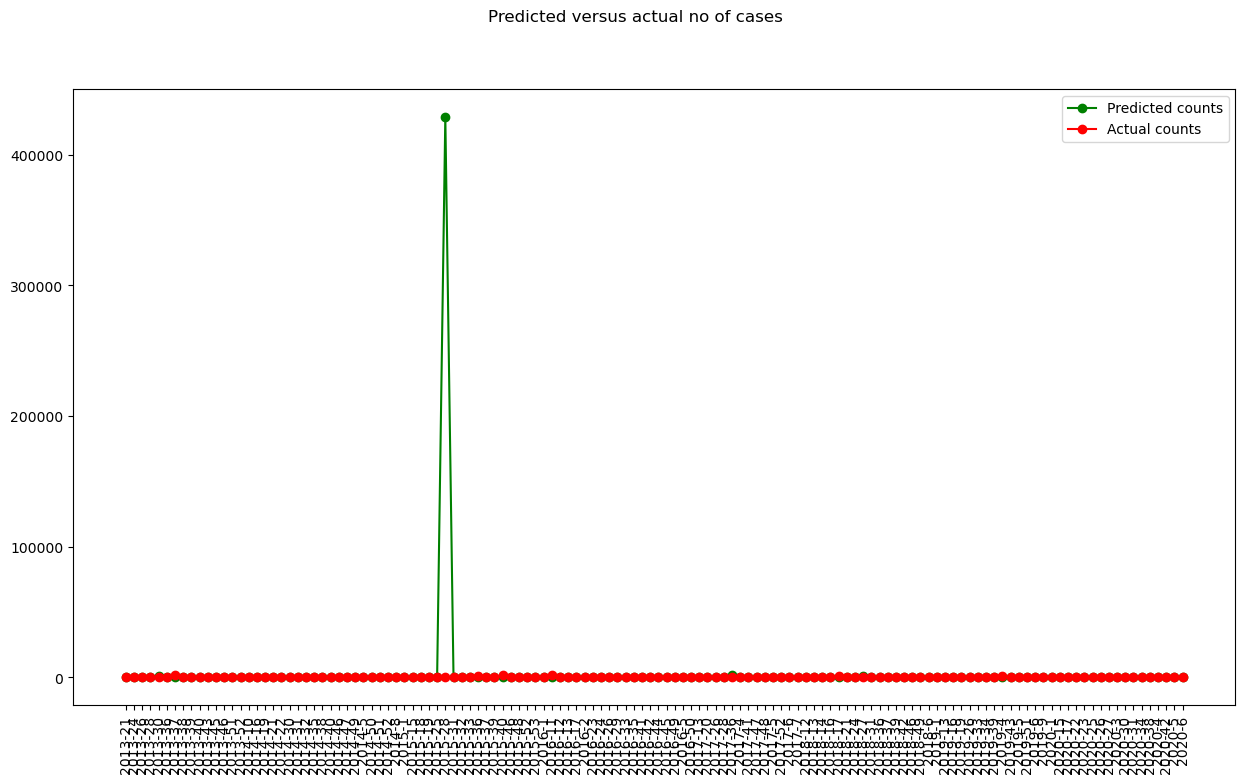

In [117]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test
x_test_sorted = x_test.sort_index()
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Predicted versus actual no of cases')
predicted, = plt.plot(x_test_sorted.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(x_test_sorted.index, actual_counts, 'ro-', label='Actual counts')
_xtick_labels = x_test_sorted.index
plt.xticks(np.arange(len(_xtick_labels)),list(_xtick_labels), rotation=90)
plt.legend(handles=[predicted, actual])
plt.show()

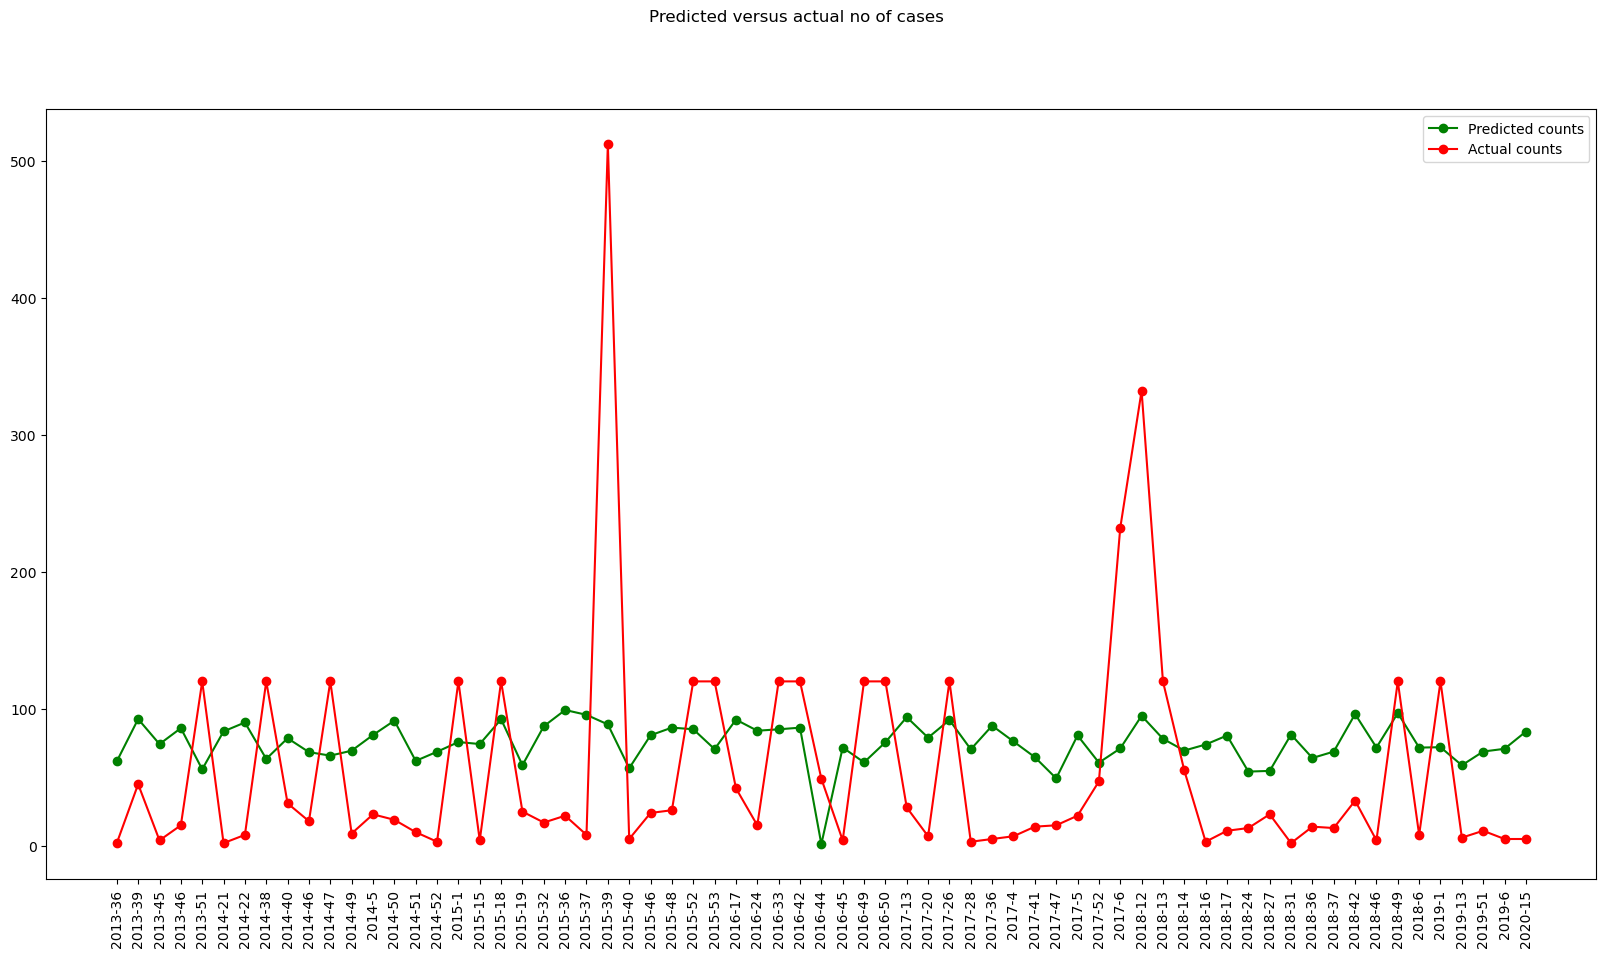

In [118]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test
x_test_filtered = x_test[predicted_counts < 100]
x_test_sorted = x_test_filtered.sort_index()
predicted_filtered = predicted_counts[predicted_counts < 100]
actual_filtered = actual_counts[predicted_counts < 100]
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Predicted versus actual no of cases')
predicted, = plt.plot(x_test_sorted.index, predicted_filtered, 'go-', label='Predicted counts')
actual, = plt.plot(x_test_sorted.index, actual_filtered, 'ro-', label='Actual counts')
_xtick_labels = x_test_sorted.index
plt.xticks(np.arange(len(_xtick_labels)),list(_xtick_labels), rotation=90)
plt.legend(handles=[predicted, actual])
plt.show()

Fit the Poisson regression model on the data set. This will give us the vector of fitted rates λ

In [119]:
x_train['lambda_'] = poison_results.mu
x_train['number'] = y_train
x_train['AUX_OLS_DEP'] = x_train.apply(lambda x: ((x['number'] - x['lambda_'])**2 - x['number']) / x['lambda_'], axis=1)

Fit the aux OLS regression model on the data set. This will give us the value of α

In [121]:
ols_expr = """AUX_OLS_DEP ~ lambda_ - 1"""

In [122]:
aux_olsr_results = smf.ols(ols_expr, x_train).fit()
print(aux_olsr_results.params)

lambda_    1.270547
dtype: float64


Use the α from STEP 2 to fit the NB2 regression model to the data set.

In [123]:
aux_olsr_results.tvalues

lambda_    2.418221
dtype: float64

Use the fitted NB2 model to make predictions about expected counts on the test data set

In [124]:
name.remove('const')

In [125]:
#x_train = x_train.drop(['lambda_','AUX_OLS_DEP','number','BB_LAMBDA '],axis = 1)
nb2_training_results = sm.GLM(y_train, x_train[name], family = sm.families.NegativeBinomial(alpha = aux_olsr_results.params [0])).fit()

In [126]:
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               no_cases   No. Observations:                  261
Model:                            GLM   Df Residuals:                      247
Model Family:        NegativeBinomial   Df Model:                           13
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1452.6
Date:                Sat, 15 Apr 2023   Deviance:                       289.54
Time:                        08:29:18   Pearson chi2:                     258.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.2157
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
total_daily_rainfall  

Test the fit of the Negative Binomial Distribution with Two Parameters model

In [128]:
nb2_predictions = nb2_training_results.get_prediction(x_test[name])

In [129]:
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

                mean     mean_se  mean_ci_lower  mean_ci_upper
index                                                         
2013-30   242.915180   54.427939     156.578872     376.856620
2014-19   106.347987   27.258778      64.350511     175.754538
2014-10   165.731466   87.012866      59.224910     463.773079
2019-26   220.685542   38.048777     157.404356     309.407629
2020-31  1102.972274  465.123413     482.628430    2520.671729
...              ...         ...            ...            ...
2016-42    74.889645   22.536279      41.521465     135.073726
2018-21    77.782713   16.550803      51.258071     118.033126
2020-5     76.566153   19.340614      46.668440     125.617567
2016-13   143.890078   32.595957      92.300697     224.314172
2017-5     66.506720   16.281745      41.160427     107.461076

[130 rows x 4 columns]


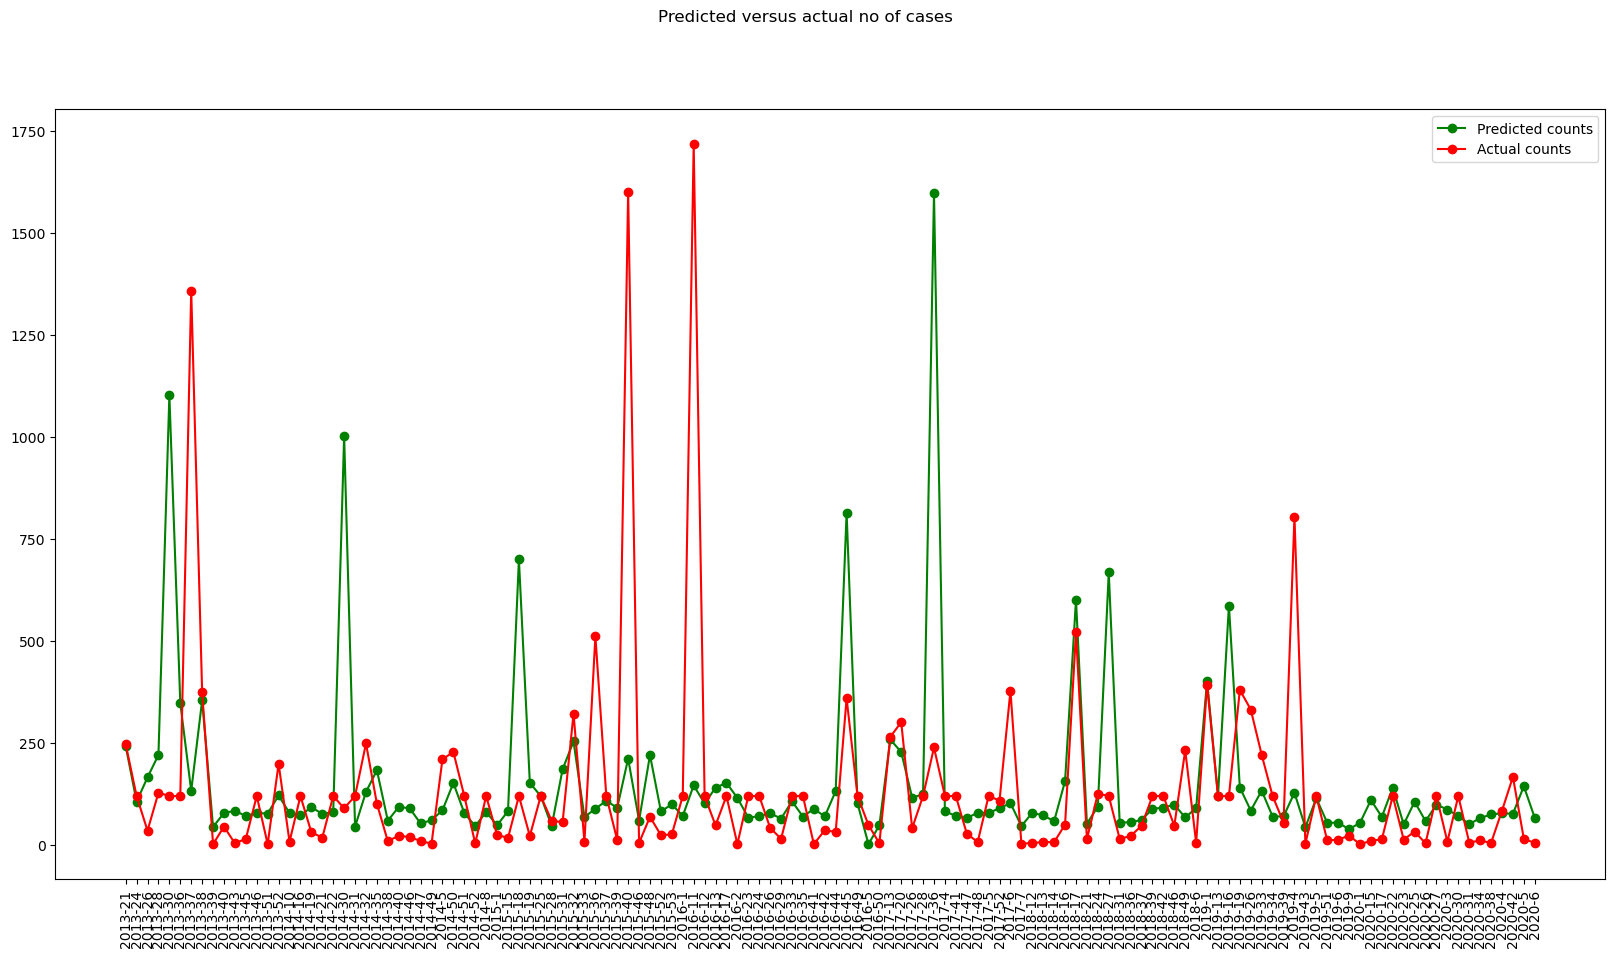

In [131]:
predicted_counts = predictions_summary_frame['mean']
actual_counts = y_test
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Predicted versus actual no of cases')

# Sort x_test DataFrame by index in ascending order
x_test_sorted = x_test.sort_index()

predicted, = plt.plot(x_test_sorted.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(x_test_sorted.index, actual_counts, 'ro-', label='Actual counts')
_xtick_labels = x_test_sorted.index
plt.xticks(np.arange(len(_xtick_labels)), list(_xtick_labels), rotation=90)
plt.legend(handles=[predicted, actual])
plt.show()